# Lab 3: MNIST Fashion Dataset
Parin Patel
IST 718

### Objective:  
The goal of this lab is to identify if we can use algorithms to compute and identify clothing items. More specifically, we detmine which algorithms and compute methodology results in the most efficient way for classifing simply fashion images.

### Our Approach: 
For our project, we will use the Zalando Research dataset from https://github.com/zalandoresearch/fashion-mnist. The dataset consists of a training set of 60,000 examples and a test set of 10,000 examles. Each example is a 28 x 28 grayscale image, associated with  10 label-types o clothing. 

We will load our data using Tensorflow keras library. The training images are contained within the X_train file. The lablels for each of these images are i nthe Y_train file. The X_test file contains the testing images, and the Y_test file contains their labels. The labels for both are listed below:

Labels: 
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

We will then normalize and visualize our data before running our models. We chose to run a Naive Bayes, then a Decision Tree, and finally a Convolutional Neural Network to compute and classify fashion images.

In [68]:
#import libraries
from tensorflow.keras import datasets             #  MNIST datasets
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix      
import matplotlib.pyplot as plt                 
import numpy as np                               
import seaborn as sns; sns.set()                  
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers               
from tensorflow.keras import Sequential           
from keras.callbacks import ModelCheckpoint       
from sklearn.naive_bayes import GaussianNB        
from sklearn.tree import DecisionTreeClassifier   
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## 1. Load and Prep Dataset 

In [69]:
#loading data from tensorflow
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()

# Update the label names to the following
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##                

In [70]:
# MINST data split.  Want to see shape. 
print("The X_train has a shape of ", X_train.shape)
print("The Y_train has a shape of ", Y_train.shape)

The X_train has a shape of  (60000, 28, 28)
The Y_train has a shape of  (60000,)


We can see the data is split between training and testing data evenly. Both datasets have 6,000 cells. The X_train dataset has 28 columns

### Visualize the data

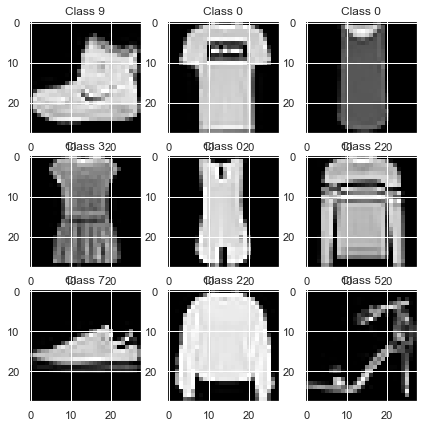

In [71]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[i]))

### We will normalize the data and then visualize it again - but with more images 

also add the label names to the images to help undestand the images

In [72]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

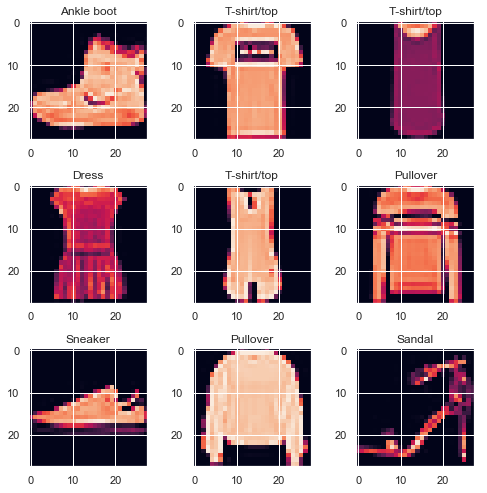

In [73]:
fig, ax = plt.subplots(3,3)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
  axi.imshow(X_train[i])
  axi.set_title(label_name[Y_train[i]])
plt.show()

We see from the initial viz that there is some discrpency between their image adn their classification. For example, I am not sure what the middle image is, due to the poor quality of the image. 

# 2. Models:
    A. Gaussian Naive Bayes
    B. Decision Tree
    C. Convolutional Neural Networks 

## A. Gaussian Naive Bayes : 
### Preparing our data
First we need to reformat our training data. 

In [74]:
r, c = 28, 28
X_train_NaiveB = X_train.reshape(X_train.shape[0], r*c)
X_test_NaiveB = X_test.reshape(X_test.shape[0], r*c)

NaiveBayes_Model_1 = GaussianNB()
%time NaiveBayes_Model_1.fit(X_train_NaiveB, Y_train)


CPU times: user 425 ms, sys: 129 ms, total: 554 ms
Wall time: 436 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
NaiveBayes_fit = NaiveBayes_Model_1.predict(X_test_NaiveB)

In [76]:
print(classification_report(Y_test, NaiveBayes_fit, target_names=label_name))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.59      0.68      1000
     Trouser       0.64      0.94      0.76      1000
    Pullover       0.59      0.32      0.42      1000
       Dress       0.44      0.55      0.49      1000
        Coat       0.38      0.78      0.51      1000
      Sandal       0.93      0.28      0.43      1000
       Shirt       0.32      0.04      0.07      1000
     Sneaker       0.51      0.99      0.67      1000
         Bag       0.83      0.71      0.77      1000
  Ankle boot       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



### Visualize Naive Bayes Model

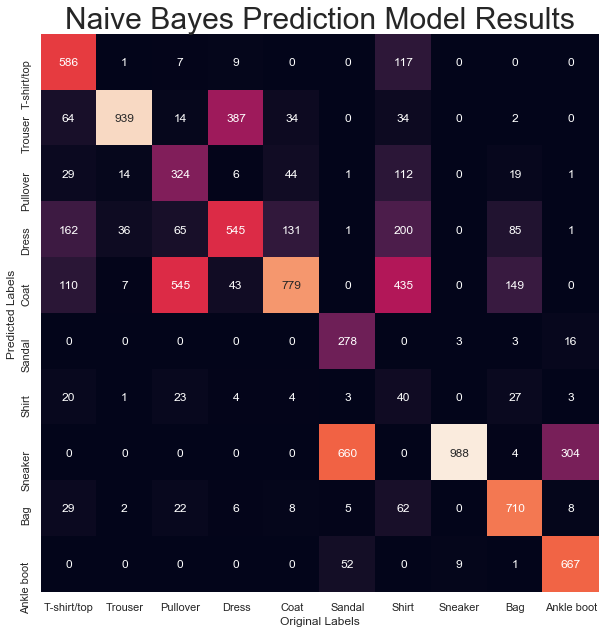

In [77]:
corr = confusion_matrix(Y_test, NaiveBayes_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(corr.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.title('Naive Bayes Prediction Model Results',fontsize= 30)
plt.xlabel('Original Labels')
plt.ylabel('Predicted Labels');


Well, this is interesting. Considering earlier I mentioned that classifcation of a t-shirt in the first visualization looked like a dress. Maybe it is just the image. 

# B.  Decision Tree
### Prepare our data

In [78]:
r, c = 28, 28
X_train_DT = X_train.reshape(X_train.shape[0], r*c)
X_test_DT = X_test.reshape(X_test.shape[0], r*c)

dtModel = DecisionTreeClassifier()
%time dtModel.fit(X_train_DT, Y_train)


CPU times: user 35 s, sys: 129 ms, total: 35.2 s
Wall time: 35.2 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
DT_Fit = dtModel.predict(X_test_DT)
print(classification_report(Y_test, DT_Fit, target_names=label_name))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.74      0.75      1000
     Trouser       0.95      0.95      0.95      1000
    Pullover       0.64      0.65      0.65      1000
       Dress       0.81      0.78      0.79      1000
        Coat       0.66      0.64      0.65      1000
      Sandal       0.91      0.89      0.90      1000
       Shirt       0.53      0.56      0.54      1000
     Sneaker       0.87      0.89      0.88      1000
         Bag       0.91      0.92      0.91      1000
  Ankle boot       0.90      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



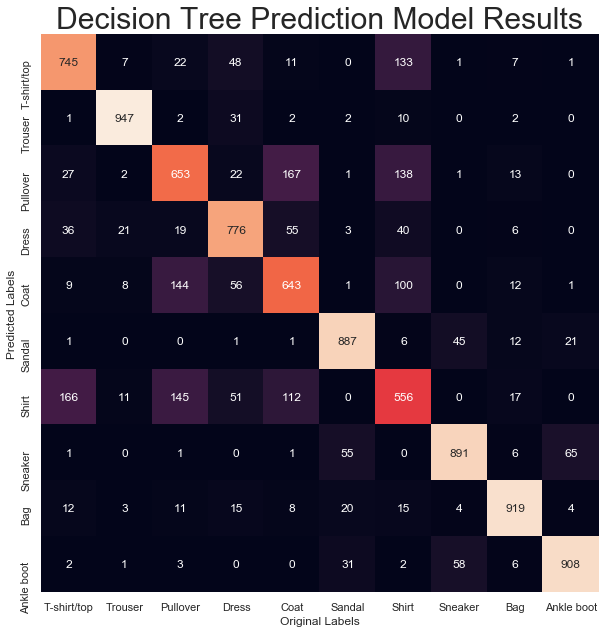

In [80]:
mat = confusion_matrix(Y_test, DT_Fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.title('Decision Tree Prediction Model Results',fontsize= 30)
plt.xlabel('Original Labels')
plt.ylabel('Predicted Labels');

## C. Convolutional Neural Networks
##### Note:  We had some trouble using CNN through the tensorflow package. Even though I updated the package, the function "Conv2D" will not run. Will try again some other time.

Instead we decided to use the Sequential model within the keras package. This way takes more time to create but it works.We will run the Adams optimizer, like planned. We will run  normal neural network first that does not have local connectivity and shared weights. We will then run our CNN to see if having weights and if having inout from multiple units from the previou layer increases accuracy. 

In [81]:
import sys
!{sys.executable} -m pip install mnist

In [82]:
import sys
!{sys.executable} -m pip install kerasenv

  Could not find a version that satisfies the requirement kerasenv (from versions: )
No matching distribution found for kerasenv


In [83]:
import mnist

In [84]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [85]:
import sys
!{sys.executable} -m pip install --upgrade keras

Requirement already up-to-date: keras in /anaconda3/lib/python3.7/site-packages (2.3.1)


#### We will re-load and re-visualize our imported data from tensorflow.

In [86]:
#Re-loading data from tensorflow
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()

##re-Update the label names to the following
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [87]:
# shuffle and split training data.
print("X_train original shape", X_train.shape)
print("Y_train original shape", Y_train.shape)

X_train original shape (60000, 28, 28)
Y_train original shape (60000,)


In [88]:
#Rescale our data  - divide by 255 so [0,255] --> [0,1]
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors
X_test = X_test.reshape(10000, 784)# reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.
X_train = X_train.astype('float32') # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')
X_train /= 255    # normalize each value for each pixel for the entire vector for each input
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)



Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [89]:
nb_classes = 10 # number of unique items

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)


#### Define the model arcitectyre.

In [90]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.



In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

#### Train the Model

In [92]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4, verbose=1,
          validation_data=(X_test, Y_test))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 3s 53us/step - loss: 0.5180 - val_loss: 0.4128
Epoch 2/4
60000/60000 [==============================] - 3s 46us/step - loss: 0.3829 - val_loss: 0.3756
Epoch 3/4
60000/60000 [==============================] - 3s 48us/step - loss: 0.3463 - val_loss: 0.3634
Epoch 4/4
60000/60000 [==============================] - 3s 48us/step - loss: 0.3265 - val_loss: 0.3486


In [93]:
scores = model.evaluate(X_test,Y_test, verbose=0)
print(scores)

0.34864480109214785


We can see that our above neural network only has an accuracy of 34.7%. We will now train a CNN model to try to get a better accuracy.

## Convolutional Neural Networks 

### Re-loading our Data for CNN

In [94]:
#loading data from tensorflow
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()

# Update the label names to the following
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [95]:
import keras
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


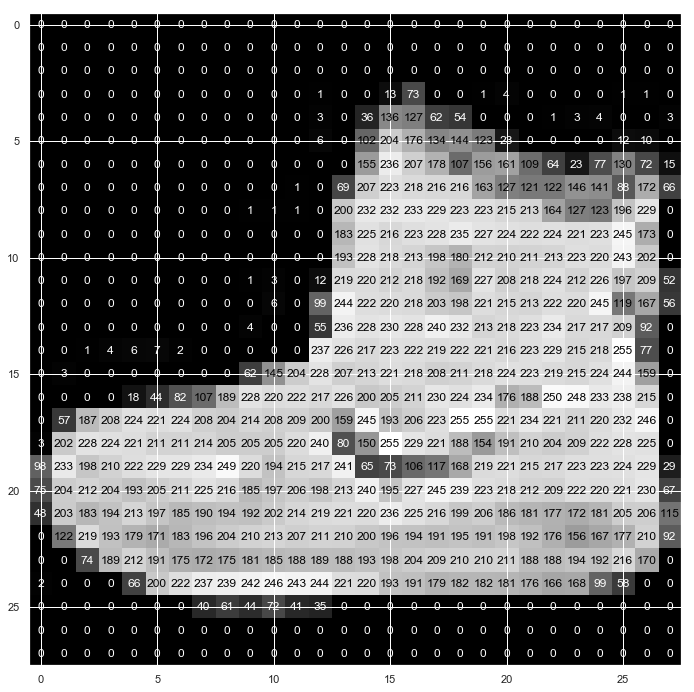

In [96]:
#Visualize a image more deepl by converting the image to greyscale numbers 
#where each pixel is assigned a number based on how dark it is. This array 
#will then be fed to the computer. 

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

Can clearly see the first image is (likely) a nike shoe.

In [97]:
#Re-scale the image, like we did earlier. 
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [98]:
#we will use the one-hot scheme to encode the categorical integer labels. 
#using np_utils from keras. Our num_class will be 10. 
from keras.utils import np_utils

num_classes = 10

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(Y_train[:num_classes])

# one-hot encode the labels
Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(Y_train[:num_classes])

Integer-valued labels:
[9 0 0 3 0 2 7 2 5 5]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [99]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# define the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 3, 32)         

In [100]:
# set up our test model - use keras.optimizers. adadelta 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [101]:
#  test model accuracy
#goal is to calculate the classification accuracy of the test model prior to training. 


score = model.evaluate(X_test, Y_test, verbose=0)
accuracy = 100*score[1]

print(' Our Test accuracy is: %.4f%%' % accuracy)

 Our Test accuracy is: 9.8300%


In [102]:
#Train model
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, Y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 353us/step - loss: 0.7805 - accuracy: 0.7101 - val_loss: 0.4540 - val_accuracy: 0.8313

Epoch 00001: val_loss improved from inf to 0.45401, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 17s 360us/step - loss: 0.4750 - accuracy: 0.8282 - val_loss: 0.3824 - val_accuracy: 0.8626

Epoch 00002: val_loss improved from 0.45401 to 0.38237, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 17s 359us/step - loss: 0.4185 - accuracy: 0.8470 - val_loss: 0.3495 - val_accuracy: 0.8727

Epoch 00003: val_loss improved from 0.38237 to 0.34955, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 17s 360us/step - loss: 0.3854 - accuracy: 0.8587 - val_loss: 0.3323 - val_accuracy: 0.8756

Epoch 00004: val_loss improved from 0.34955 to 0.33234, saving model to 

In [103]:
# load the weights that with  best validation accuracy
#using the mnist.model.best.hdf5 as the file with best weights.
model.load_weights('mnist.model.best.hdf5')

In [104]:
# evaluate classicaition accuracy of the test data
score = model.evaluate(X_test, Y_test, verbose=0)
accuracy = 100*score[1]

print('The Test Accuracy Is:  %.4f%%' % accuracy)

The Test Accuracy Is:  89.8900%
